In [14]:
from __future__ import print_function, division

from sklearn import datasets
from sklearn.manifold import Isomap, MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

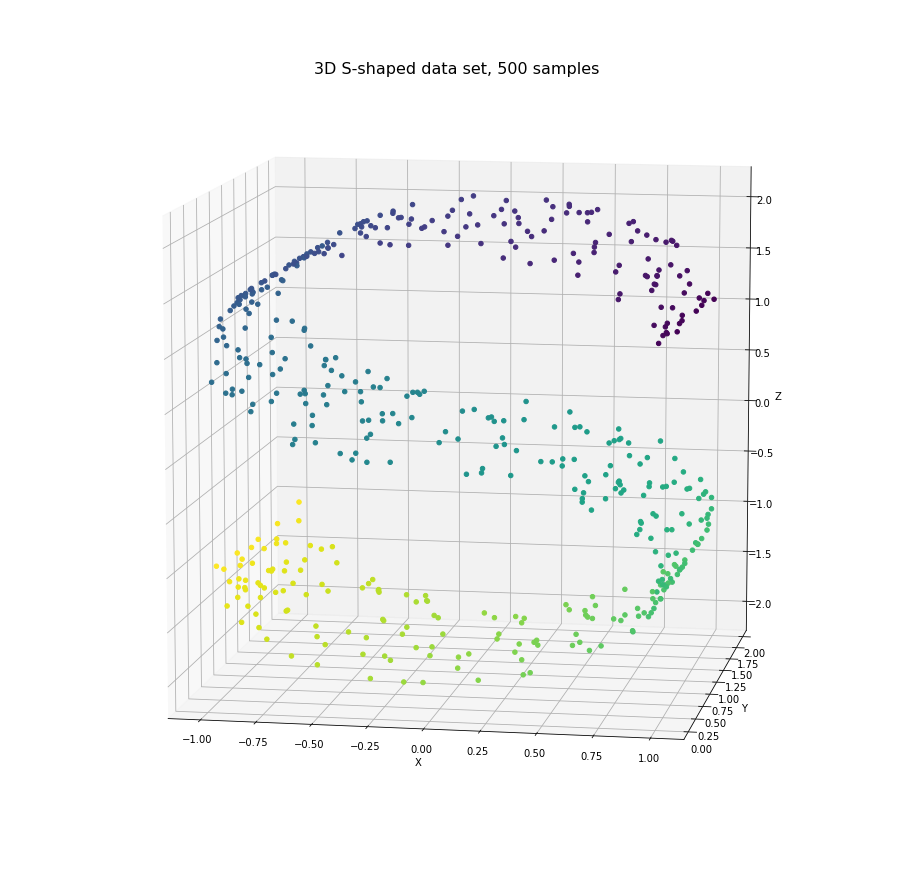

In [15]:
n_samples = 500
X, t = datasets.make_s_curve(n_samples=n_samples, random_state=0)
n_points = X.shape[0]

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = X.transpose()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(xs, ys, zs, c=t, alpha=1)

ax.view_init(10, 280)
ax.set_title('3D S-shaped data set, {} samples'.format(n_samples), fontsize=16)
plt.savefig('presentation/images/scatter_points.png', bbox_inches='tight')
plt.show()

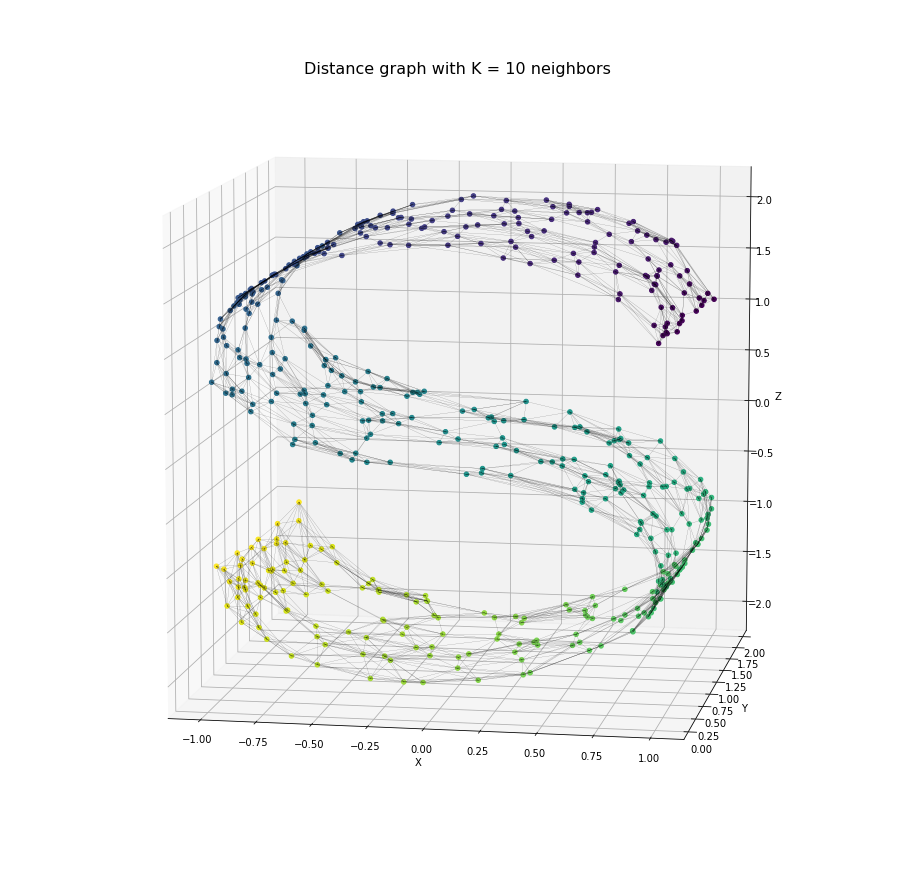

In [16]:
n_neighbors = 10
neigh = NearestNeighbors(n_neighbors=n_neighbors)
neigh.fit(X)

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# keep track of which edges has been plotted
edges = set()

# plot neighbors graph
for i in range(n_points):
    dist, ind = neigh.kneighbors([X[i]], return_distance=True)
    for d, j in zip(dist[0], ind[0]):
        # don't plot "loop" edges
        if i != j:
            e = frozenset((i, j))
            # don't plot duplicate edges
            if e not in edges:
                line_coords = zip(X[i], X[j])
                # plot edge between neighbors
                ax.plot(*line_coords, c='k', linewidth=1/n_neighbors)
                edges.add(e)
    
ax.scatter(xs, ys, zs, c=t, alpha=1)
ax.view_init(10, 280)
ax.set_title('Distance graph with K = {} neighbors'.format(n_neighbors), fontsize=16)

plt.savefig('presentation/images/distance_graph.png', bbox_inches='tight')
plt.show()

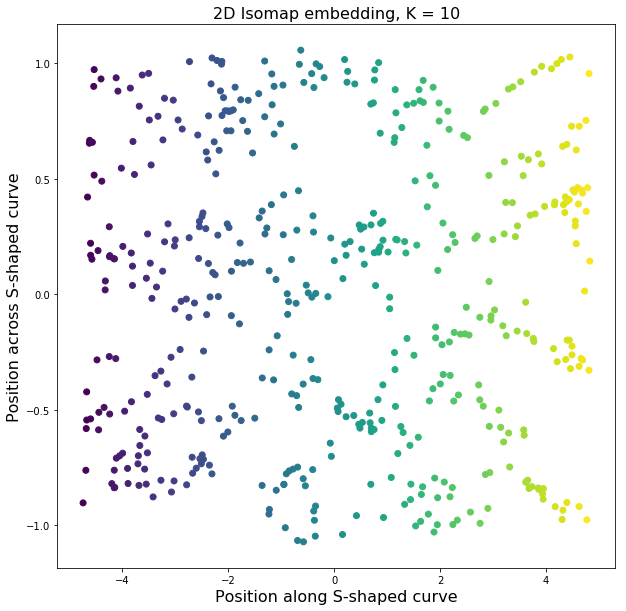

In [17]:
Y = Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(*Y.transpose(), c=t)
ax.set_xlabel('Position along S-shaped curve', fontsize=16)
ax.set_ylabel('Position across S-shaped curve', fontsize=16)
ax.set_title('2D Isomap embedding, K = {}'.format(n_neighbors), fontsize=16)

plt.savefig('presentation/images/isomap_embedding.png', bbox_inches='tight')
plt.show()

explained variance: [ 0.68954215  0.19129567]


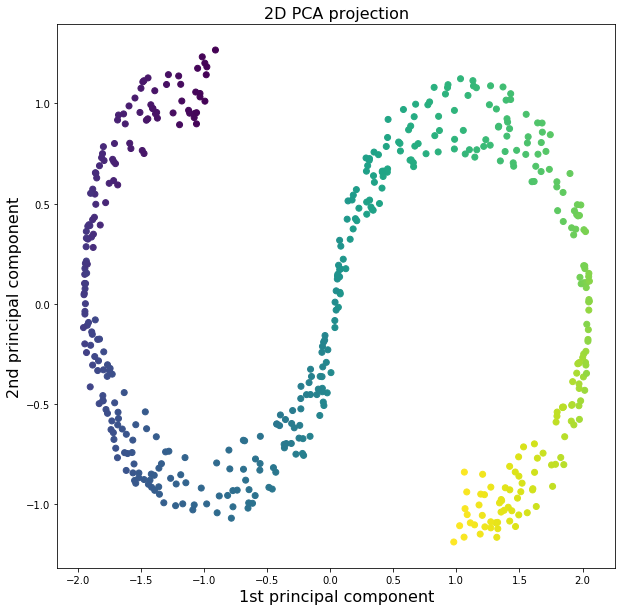

In [18]:
pca = PCA(n_components=2, random_state=0)
Y = pca.fit_transform(X)
print('explained variance:', pca.explained_variance_ratio_)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(*Y.transpose(), c=t)
ax.set_title('2D PCA projection', fontsize=16)
ax.set_xlabel('1st principal component', fontsize=16)
ax.set_ylabel('2nd principal component', fontsize=16)

plt.savefig('presentation/images/pca_embedding.png', bbox_inches='tight')
plt.show()

Stress: 9421.42501238


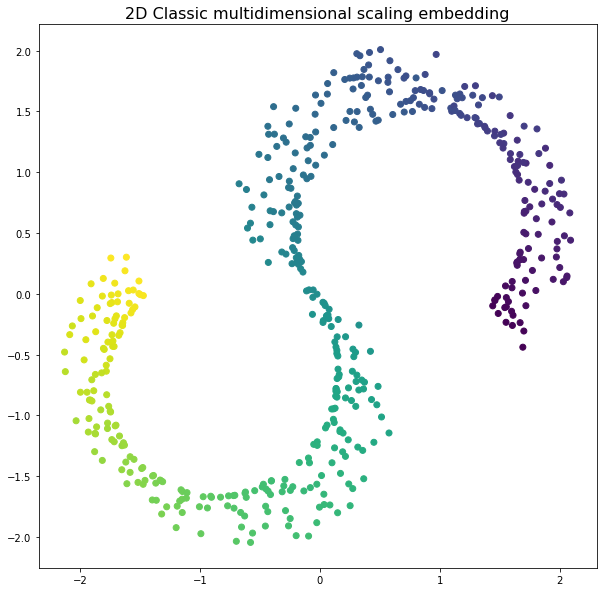

In [19]:
mds = MDS(n_components=2, random_state=0)
Y = mds.fit_transform(X)
print('Stress:', mds.stress_)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(*Y.transpose(), c=t)
ax.set_title('2D Classic multidimensional scaling embedding', fontsize=16)

plt.savefig('presentation/images/mds_embedding.png', bbox_inches='tight')
plt.show()